# PREPROCESSING

In [5]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy  as  np
import seaborn as sns

In [6]:
train = pd.read_csv("train.csv")
train.shape[0]

1458644

In [7]:
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Assuming the distance and duration is what influences the trip, the distance is computer with the formula below:

In [8]:
def compute_distances(data):
    pickup_latitudes = train["pickup_latitude"]
    pickup_longitudes = train["pickup_longitude"]

    dropoff_latitudes = train["dropoff_latitude"]
    dropoff_longitudes = train["dropoff_longitude"]

    delta_latitude = dropoff_latitudes - pickup_latitudes
    delta_longitude = dropoff_longitudes - pickup_longitudes
    delta_longitude = delta_longitude * np.cos(pickup_latitudes)

    return 110.25 * np.sqrt(np.square(delta_longitude) + np.square(delta_latitude))

Create a new column labeled 'Distance' and the distance for every row is calculated and insterted to the column

In [9]:
distances = compute_distances(train)
train['distance'] = pd.Series(distances, index=train.index)


train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.944101
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.245056
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.603957
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.481267
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.178525


In [29]:
#convert trip duration to minutes
def convert_to_minutes(data):
    duration = train["trip_duration"]

    mint = duration/60

    return mint.round(2)


In [37]:
dur_minutes = convert_to_minutes(train)
train['dur_min'] = pd.Series(dur_minutes, index=train.index)


train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dur_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.944101,7.58
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.245056,11.05
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.603957,35.40
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.481267,7.15
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.178525,7.25


In [38]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,dur_min
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.898067e+00,1.599154e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,5.017997e+00,8.729053e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2.000000e-02
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.384631e+00,6.620000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.334920e+00,1.103000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,4.227127e+00,1.792000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.227150e+03,5.877137e+04


In [39]:
train['dur_min'].max()

58771.37

In [40]:
train['dur_min'].min()

0.02

## DATA EXPLORATION

Linear Regression approach is used  to  modelling of the relationship between dependent variable- duration and other indepented variable. 

In [11]:
from sklearn.linear_model import LinearRegression #import Linear Regression library

In [12]:
train_data = pd.DataFrame(train) #construct data frame

In [13]:
#list to drop irrelevant variables and trip duration, leaving only variables that we want to fit into the model
list_to_drop = ['id','vendor_id','passenger_count','store_and_fwd_flag','pickup_datetime','dropoff_datetime','trip_duration']
linear_data = train.drop((list_to_drop),axis = 'columns')

In [14]:
lm = LinearRegression()

In [15]:
 #Fit oter 5 paramaters into the linear regression model pickup_longitude, 
# pickup_latitude, dropoff_longitude, dropoff_latitude, distance
lm.fit(linear_data, train.trip_duration)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#estimated intercept coefficient
lm.intercept_  


86058.22509548135

In [17]:
#number of coefficients
len(lm.coef_)

5

In [18]:
pd.DataFrame(linear_data.columns, lm.coef_)

,0
-103.393388,pickup_longitude
-1183.951813,pickup_latitude
297.650127,dropoff_longitude
-560.981492,dropoff_latitude
97.285779,distance


The highest coefficient goes to the dropoff_longtitude, and then followed by distance. 

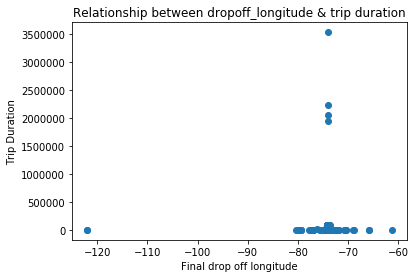

In [19]:
plt.scatter(train.dropoff_longitude, train.trip_duration)
plt.xlabel('Final drop off longitude')
plt.ylabel('Trip Duration')
plt.title('Relationship between dropoff_longitude & trip duration')
plt.show()

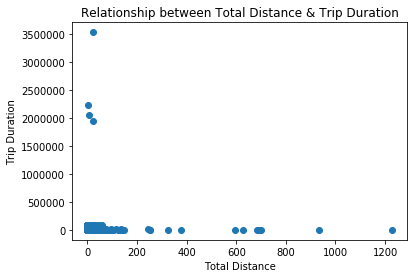

In [20]:
plt.scatter(train.distance, train.trip_duration)
plt.xlabel('Total Distance')
plt.ylabel('Trip Duration')
plt.title('Relationship between Total Distance & Trip Duration')
plt.show()

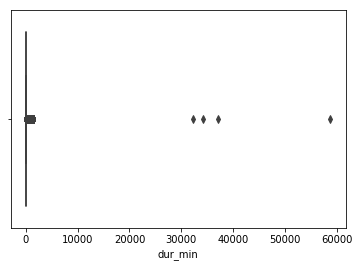

In [32]:
ax = sns.boxplot(x=train['dur_min'])

# Predicting duration

In [92]:
lm.predict(linear_data)[0:10]

array([ 745.02166163,  817.84955014, 1221.79700751,  778.5202919 ,
        627.72039393,  711.21824902,  719.70867883, 1175.65206801,
        762.66621826, 1064.6597076 ])

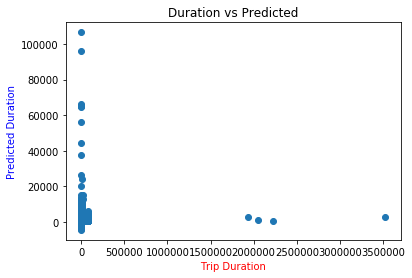

In [100]:
plt.scatter(train.trip_duration, lm.predict(linear_data))
plt.xlabel('Trip Duration', color='red')
plt.ylabel('Predicted Duration',color='blue')
plt.title('Duration vs Predicted')
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

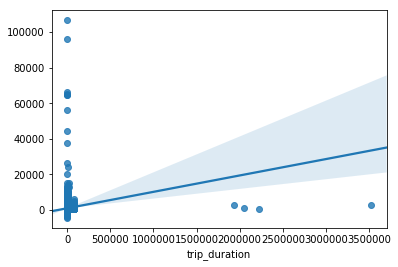

In [102]:
import seaborn as sns
sns.regplot(x=train.trip_duration, y= lm.predict(linear_data))
sns.plt.show()